# IF YOU CAN DO IT, THEN IT'S EASY

## Import and read file

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import math
import xgboost as xgb
import catboost as cb
from scipy.stats import norm
from scipy import stats
import numpy as np
from sklearn.model_selection import GridSearchCV

In [72]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

## Tryna do sum Data Cleaning things🗿

#### Checking the data hehehe

In [73]:
test.head()

id Sex  Length  Diameter  Height     Weight  Shucked Weight   
0  74051   I  1.0500    0.7625  0.2750   8.618248        3.657085  \
1  74052   I  1.1625    0.8875  0.2750  15.507176        7.030676   
2  74053   F  1.2875    0.9875  0.3250  14.571643        5.556502   
3  74054   F  1.5500    0.9875  0.3875  28.377849       13.380964   
4  74055   I  1.1125    0.8500  0.2625  11.765042        5.528153   

   Viscera Weight  Shell Weight  
0        1.729319      2.721552  
1        3.246018      3.968930  
2        3.883882      4.819415  
3        6.548735      7.030676  
4        2.466407      3.331066

In [74]:
train.head()

id Sex  Length  Diameter  Height     Weight  Shucked Weight   
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926  \
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664   

   Viscera Weight  Shell Weight  Age  
0        6.647958      8.348928    9  
1        2.324659      3.401940    8  
2        5.556502      6.662133    9  
3       10.991839     14.996885   11  
4        4.507570      5.953395    8

In [75]:
len(test)

49368

In [76]:
print(test["Sex"].unique())

['I' 'F' 'M']


In [77]:
test.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [78]:
train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [79]:
duplicate_dropped = test.drop_duplicates()
print(len(duplicate_dropped)==len(test))
#There aint no duplicate -> aint nothing but a heartbreak🗿

True


In [80]:
len(train[train["Sex"]=="I"])

23957

In [81]:
train["Weight"]

0        28.973189
1        10.418441
2        24.777463
3        50.660556
4        23.289114
           ...    
74046    50.660556
74047    10.446791
74048    29.483480
74049    16.768729
74050     5.386405
Name: Weight, Length: 74051, dtype: float64

### Trying binary encoder, hooray👍🏼(Aint gonna use it tho 💀)

In [82]:
encoder = ce.BinaryEncoder(cols=['Sex'])
test_binary_encoded = encoder.fit_transform(test)
train_binary_encoded = encoder.fit_transform(train)

In [83]:
test_binary_encoded

id  Sex_0  Sex_1  Length  Diameter  Height     Weight   
0       74051      0      1  1.0500    0.7625  0.2750   8.618248  \
1       74052      0      1  1.1625    0.8875  0.2750  15.507176   
2       74053      1      0  1.2875    0.9875  0.3250  14.571643   
3       74054      1      0  1.5500    0.9875  0.3875  28.377849   
4       74055      0      1  1.1125    0.8500  0.2625  11.765042   
...       ...    ...    ...     ...       ...     ...        ...   
49363  123414      1      0  1.3000    1.0375  0.3250  16.315137   
49364  123415      0      1  1.0375    0.7625  0.2625  10.276694   
49365  123416      1      0  1.4875    1.1625  0.3625  31.382897   
49366  123417      1      0  1.2375    0.9500  0.2875  15.663099   
49367  123418      1      1  1.6625    1.3000  0.4375  36.613379   

       Shucked Weight  Viscera Weight  Shell Weight  
0            3.657085        1.729319      2.721552  
1            7.030676        3.246018      3.968930  
2            5.556502        3.883882      4.819415  
3           13.380964        6.548735      7.030676  
4            5.528153        2.466407      3.331066  
...               ...             ...           ...  
49363        6.690482        5.173784      3.756309  
49364        4.436697        1.998640      3.543687  
49365       11.396499        6.846404      8.788345  
49366        6.095142        3.727959      4.961163  
49367       14.911837        8.292229     10.489315  

[49368 rows x 10 columns]

### Trying numerical encoder

In [84]:
le = LabelEncoder()
le.fit(test["Sex"])
train_numerical_encoded = train.copy()
test_numerical_encoded = test.copy()
train_numerical_encoded["Sex"] = le.transform(train_numerical_encoded["Sex"])
test_numerical_encoded["Sex"] = le.transform(test_numerical_encoded["Sex"])

In [85]:
test_numerical_encoded

id  Sex  Length  Diameter  Height     Weight  Shucked Weight   
0       74051    1  1.0500    0.7625  0.2750   8.618248        3.657085  \
1       74052    1  1.1625    0.8875  0.2750  15.507176        7.030676   
2       74053    0  1.2875    0.9875  0.3250  14.571643        5.556502   
3       74054    0  1.5500    0.9875  0.3875  28.377849       13.380964   
4       74055    1  1.1125    0.8500  0.2625  11.765042        5.528153   
...       ...  ...     ...       ...     ...        ...             ...   
49363  123414    0  1.3000    1.0375  0.3250  16.315137        6.690482   
49364  123415    1  1.0375    0.7625  0.2625  10.276694        4.436697   
49365  123416    0  1.4875    1.1625  0.3625  31.382897       11.396499   
49366  123417    0  1.2375    0.9500  0.2875  15.663099        6.095142   
49367  123418    2  1.6625    1.3000  0.4375  36.613379       14.911837   

       Viscera Weight  Shell Weight  
0            1.729319      2.721552  
1            3.246018      3.968930  
2            3.883882      4.819415  
3            6.548735      7.030676  
4            2.466407      3.331066  
...               ...           ...  
49363        5.173784      3.756309  
49364        1.998640      3.543687  
49365        6.846404      8.788345  
49366        3.727959      4.961163  
49367        8.292229     10.489315  

[49368 rows x 9 columns]

In [86]:
train_numerical_encoded

id  Sex  Length  Diameter  Height     Weight  Shucked Weight   
0          0    1  1.5250    1.1750  0.3750  28.973189       12.728926  \
1          1    1  1.1000    0.8250  0.2750  10.418441        4.521745   
2          2    2  1.3875    1.1125  0.3750  24.777463       11.339800   
3          3    0  1.7000    1.4125  0.5000  50.660556       20.354941   
4          4    1  1.2500    1.0125  0.3375  23.289114       11.977664   
...      ...  ...     ...       ...     ...        ...             ...   
74046  74046    0  1.6625    1.2625  0.4375  50.660556       20.680960   
74047  74047    1  1.0750    0.8625  0.2750  10.446791        4.323299   
74048  74048    0  1.4875    1.2000  0.4125  29.483480       12.303683   
74049  74049    1  1.2125    0.9625  0.3125  16.768729        8.972617   
74050  74050    1  0.9125    0.6750  0.2000   5.386405        2.055339   

       Viscera Weight  Shell Weight  Age  
0            6.647958      8.348928    9  
1            2.324659      3.401940    8  
2            5.556502      6.662133    9  
3           10.991839     14.996885   11  
4            4.507570      5.953395    8  
...               ...           ...  ...  
74046       10.361742     12.332033   10  
74047        2.296310      3.543687    6  
74048        7.540967      8.079607   10  
74049        2.919999      4.280774    8  
74050        1.034757      1.700970    6  

[74051 rows x 10 columns]

### Drop the I Sex (hell nahh 😔)

In [87]:
drop_i_train = train_numerical_encoded[train_numerical_encoded["Sex"] != 1]


In [88]:
drop_i_train

id  Sex  Length  Diameter  Height     Weight  Shucked Weight   
2          2    2  1.3875    1.1125  0.3750  24.777463       11.339800  \
3          3    0  1.7000    1.4125  0.5000  50.660556       20.354941   
5          5    2  1.5000    1.1750  0.4125  28.845616       13.409313   
6          6    2  1.5750    1.1375  0.3500  30.022120       11.935140   
8          8    0  1.6000    1.2875  0.4375  38.824640       16.967176   
...      ...  ...     ...       ...     ...        ...             ...   
74043  74043    2  1.2500    1.0000  0.3000  17.463292        6.775531   
74044  74044    0  1.5750    1.2500  0.3875  31.708916       13.295915   
74045  74045    0  1.6250    1.4125  0.4875  49.874538       23.005619   
74046  74046    0  1.6625    1.2625  0.4375  50.660556       20.680960   
74048  74048    0  1.4875    1.2000  0.4125  29.483480       12.303683   

       Viscera Weight  Shell Weight  Age  
2            5.556502      6.662133    9  
3           10.991839     14.996885   11  
5            6.789705      7.937860   10  
6            7.342521      8.646598   11  
8            7.413394     10.772810   12  
...               ...           ...  ...  
74043        3.898056      5.244657    9  
74044        7.328346      9.497082   10  
74045       10.248344     11.481547   10  
74046       10.361742     12.332033   10  
74048        7.540967      8.079607   10  

[50094 rows x 10 columns]

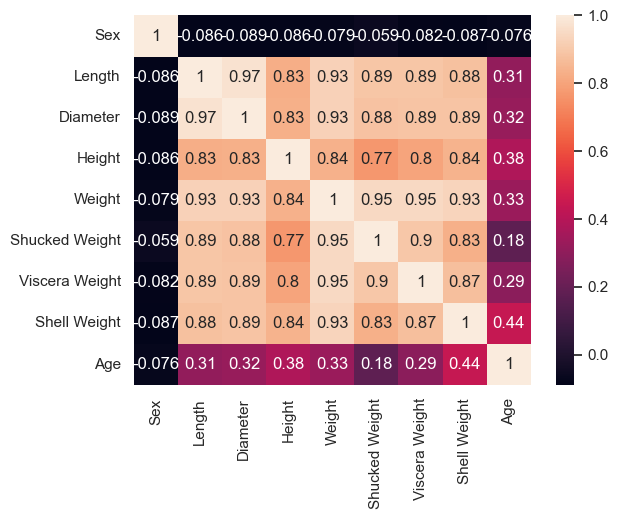

<Figure size 5000x5000 with 0 Axes>

In [89]:
sns.heatmap(drop_i_train.drop("id", axis=1).corr(), annot=True)
plt.figure(figsize=(50, 50))
plt.show()

## Tryin to do EDA🙏

### Plotting

#### Histogram Plot

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Shucked Weight'}>,
        <Axes: title={'center': 'Viscera Weight'}>],
       [<Axes: title={'center': 'Shell Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

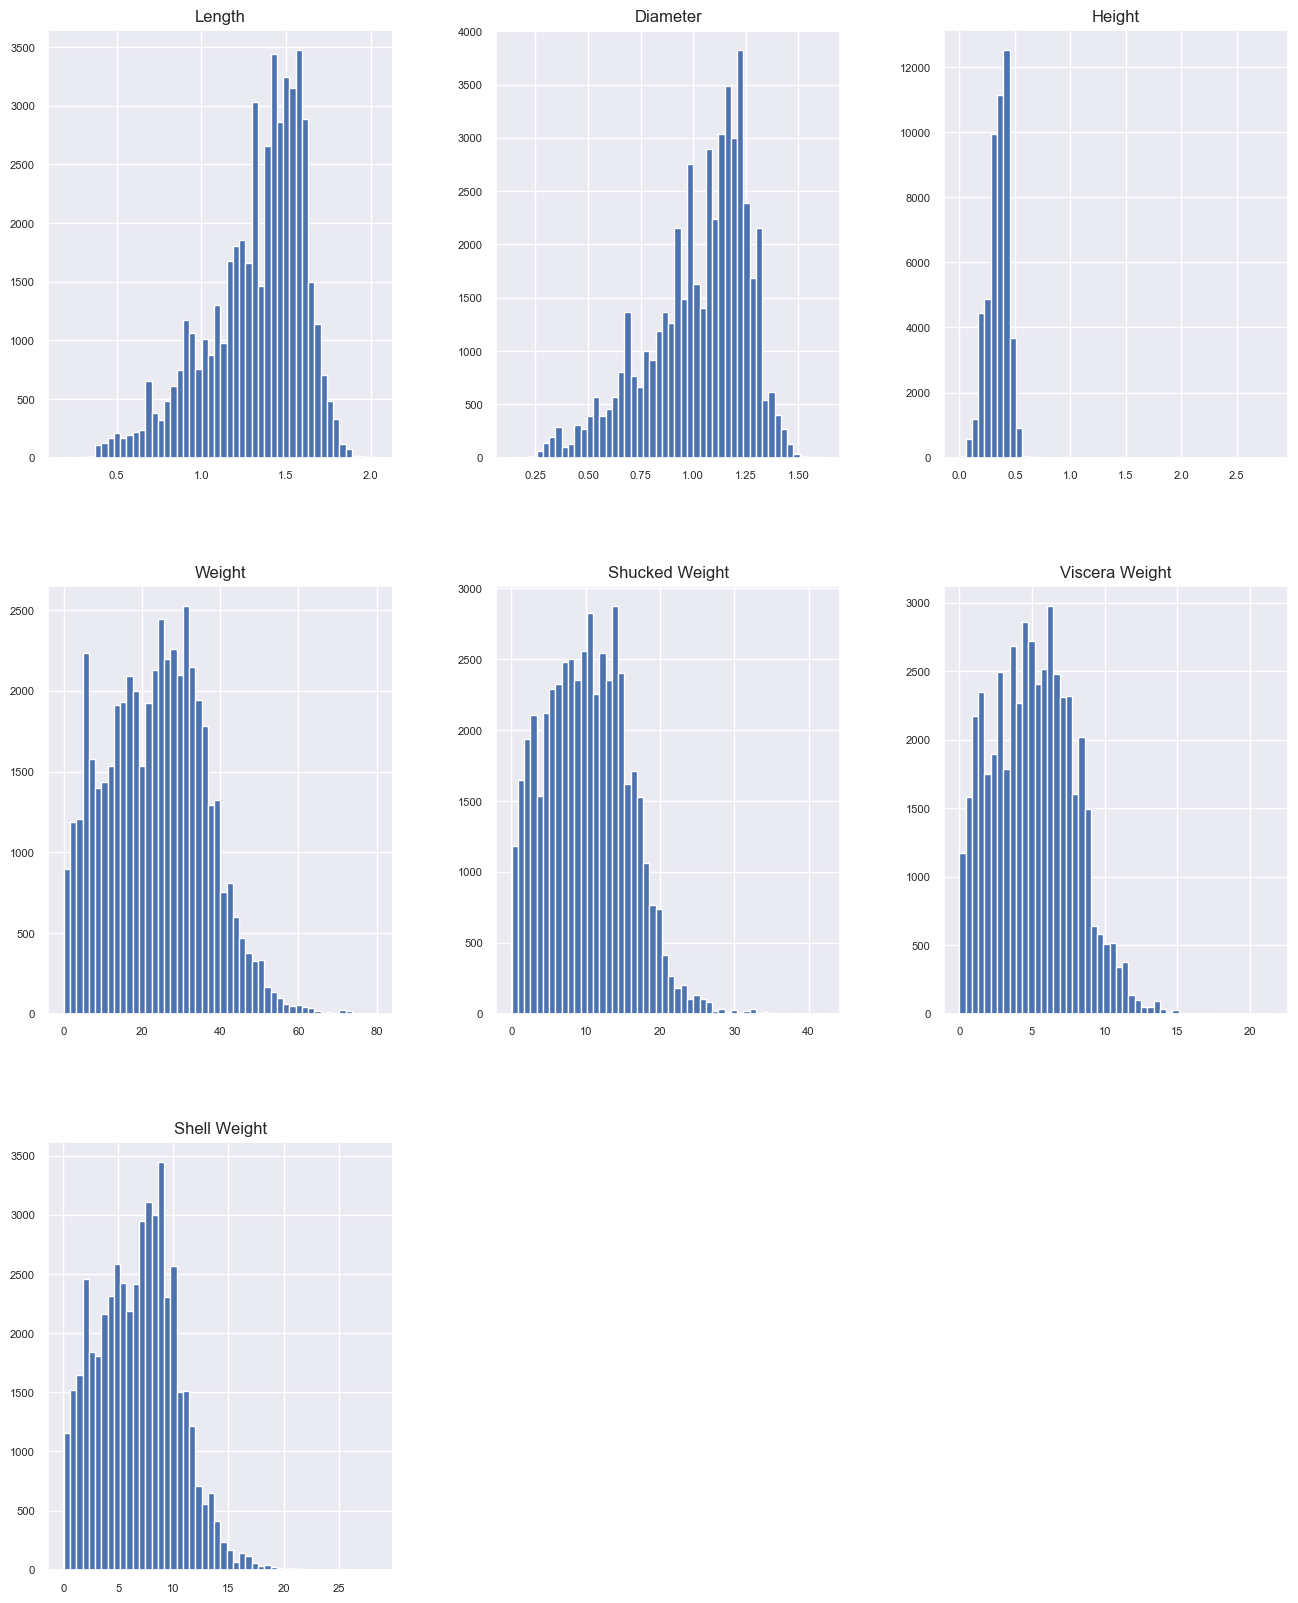

In [90]:
test.drop("id", axis=1).hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

#### Box plot

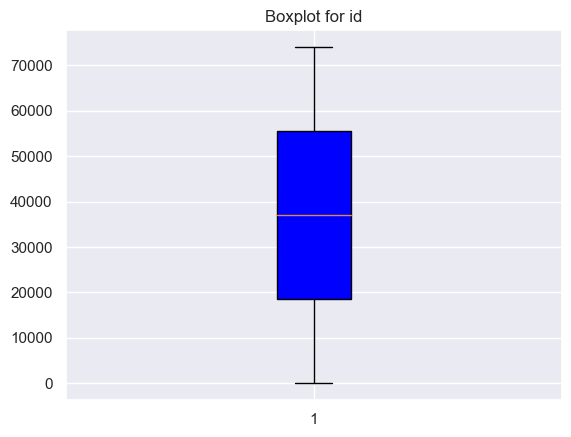

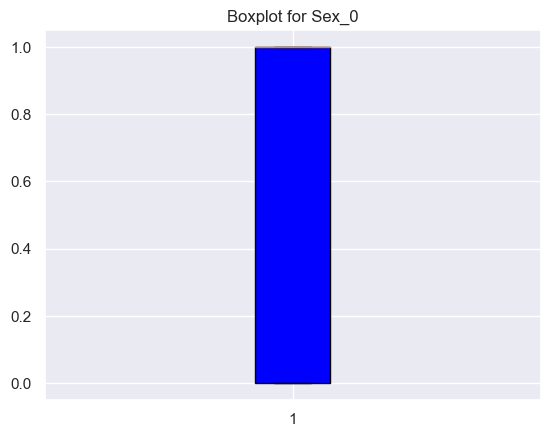

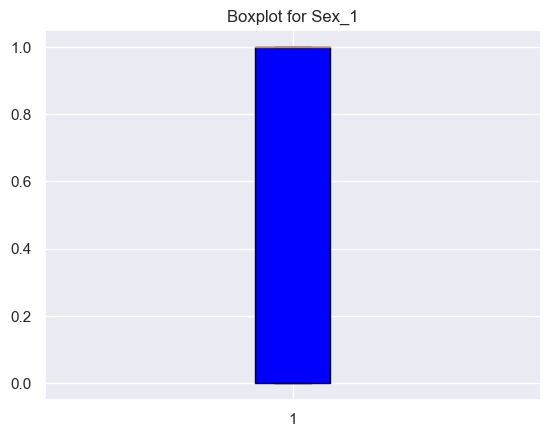

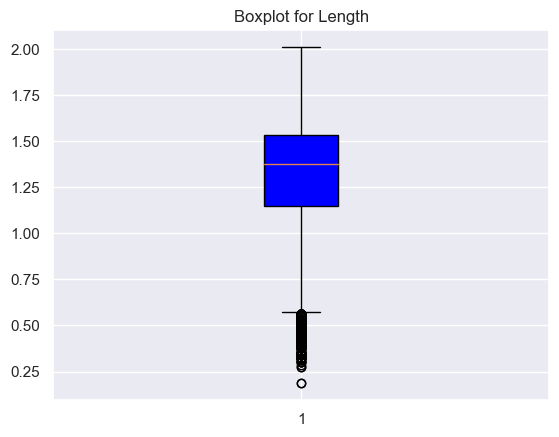

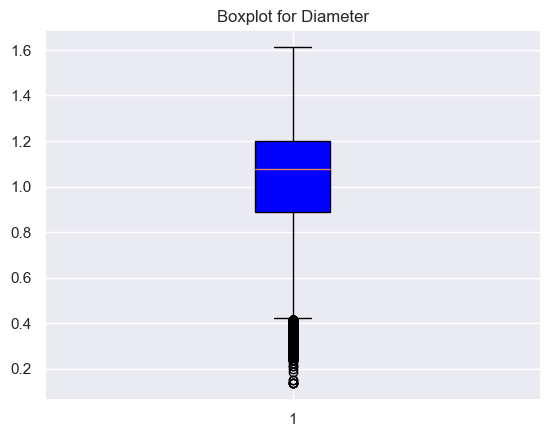

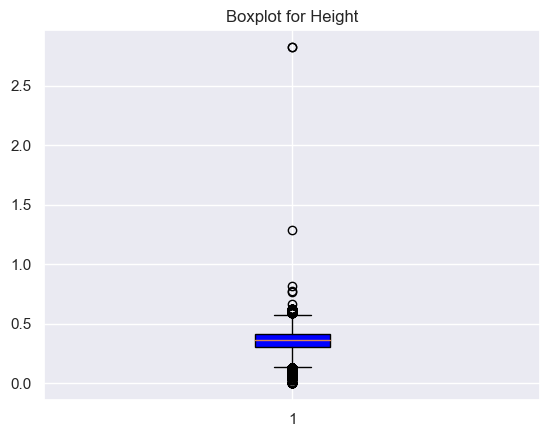

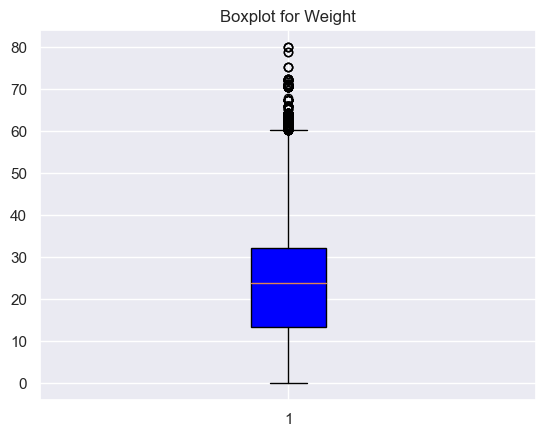

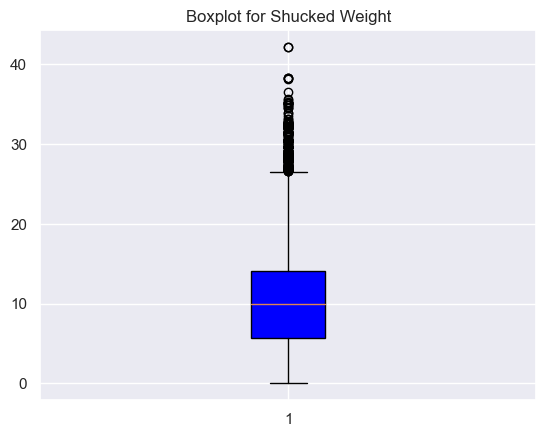

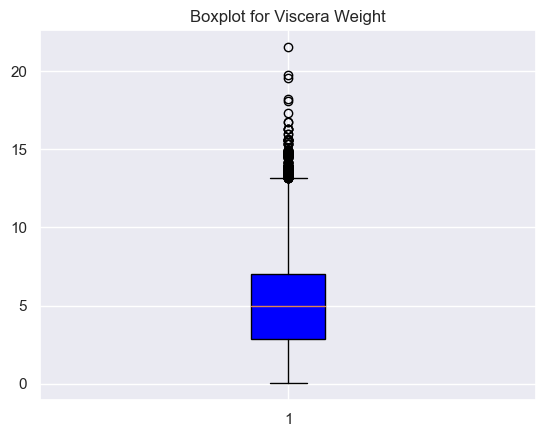

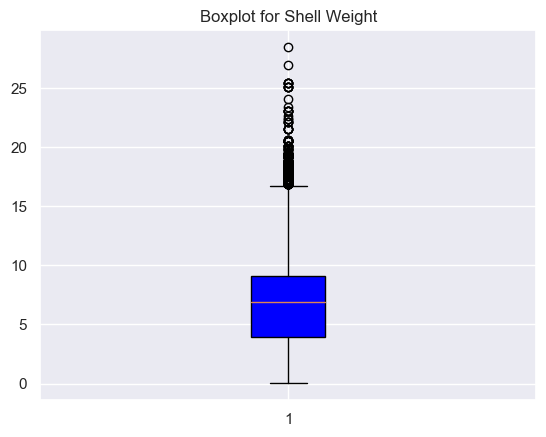

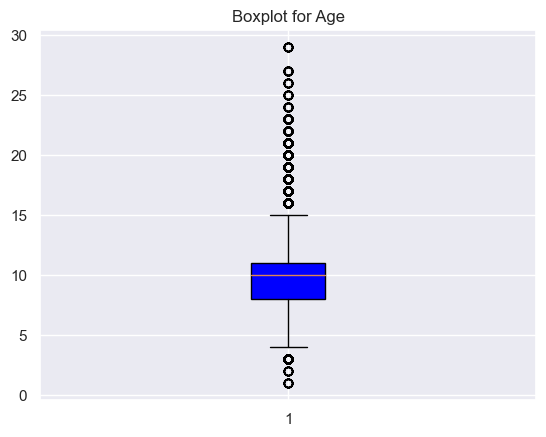

In [91]:
for column in train_binary_encoded.columns:
    # Create a boxplot for the current column
    plt.boxplot(train_binary_encoded[column], patch_artist=True, boxprops=dict(facecolor='blue'))
    
    # Set the title of the plot to the column name
    plt.title(f"Boxplot for {column}")
    
    # Show the plot
    plt.show()


### Remove outliers

In [98]:
cols = train_binary_encoded.columns.difference(["Sex_0","Sex_1","id", "Height"])
for col in cols:    
    Q1 = train_binary_encoded[col].quantile(0.25)
    Q3 = train_binary_encoded[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Identify and remove outliers
    train_binary_encoded = train_binary_encoded[~((train_binary_encoded[col] < lower_threshold) | (train_binary_encoded[col] > upper_threshold))]


#### Scatter plot

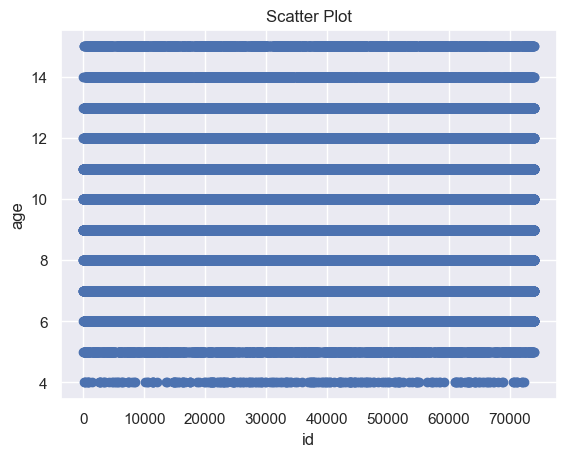

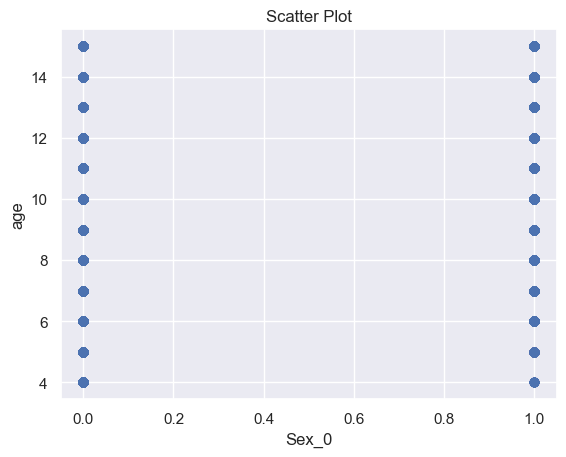

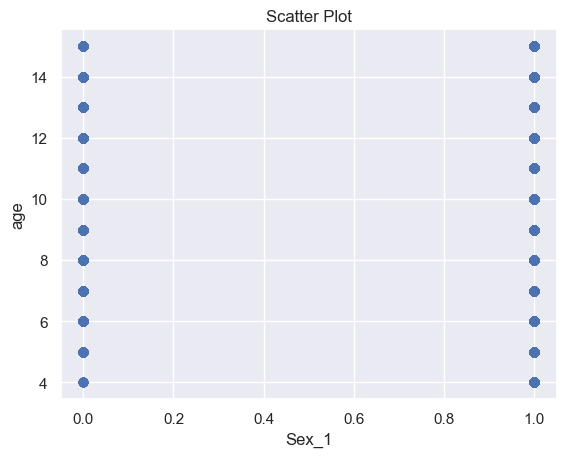

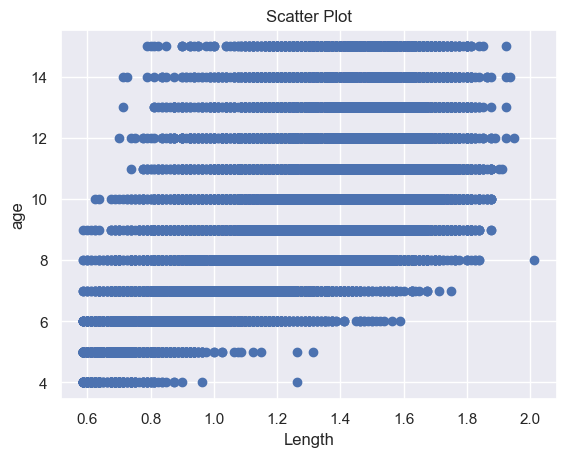

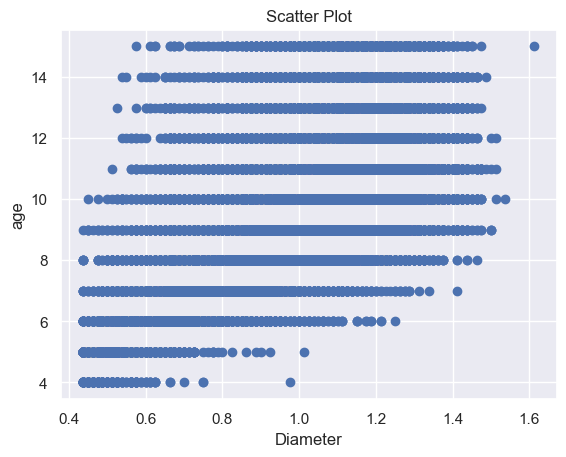

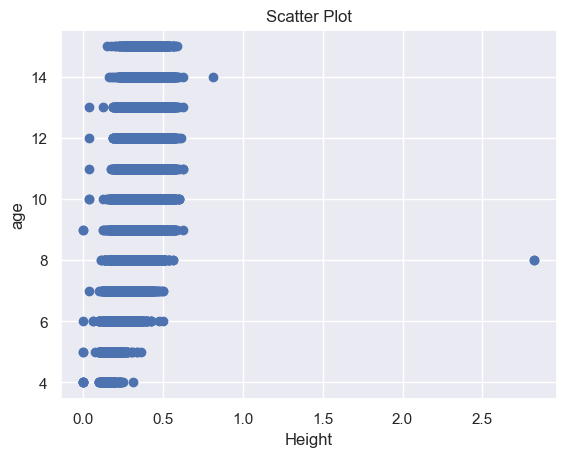

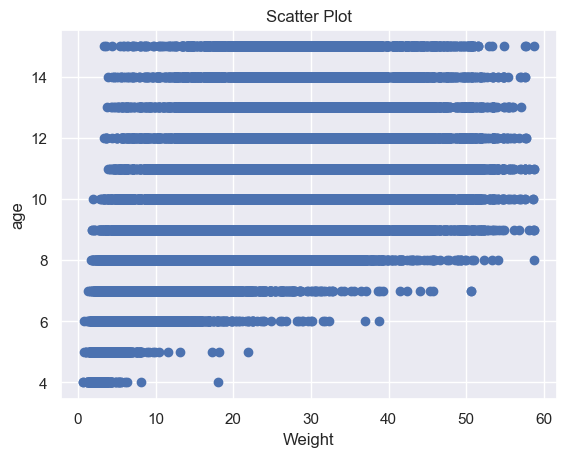

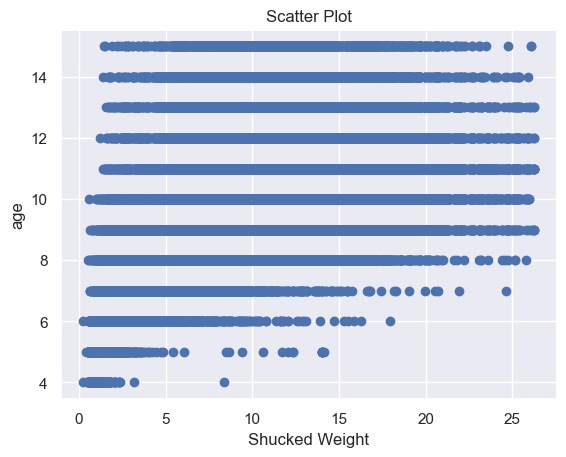

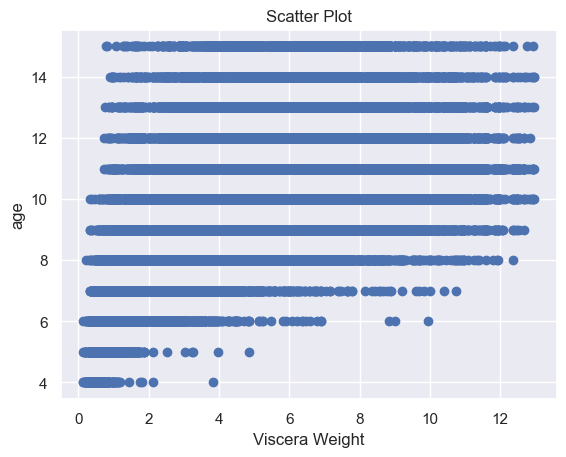

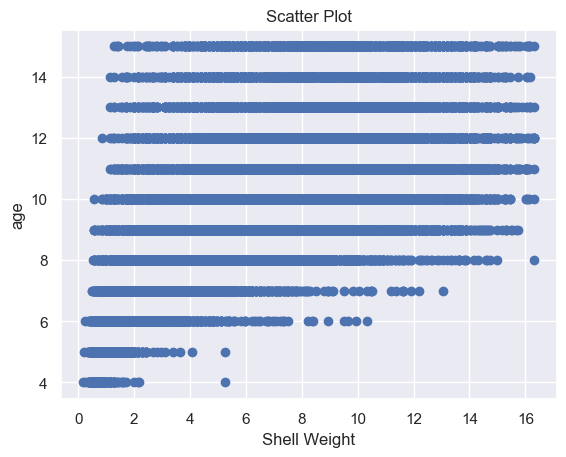

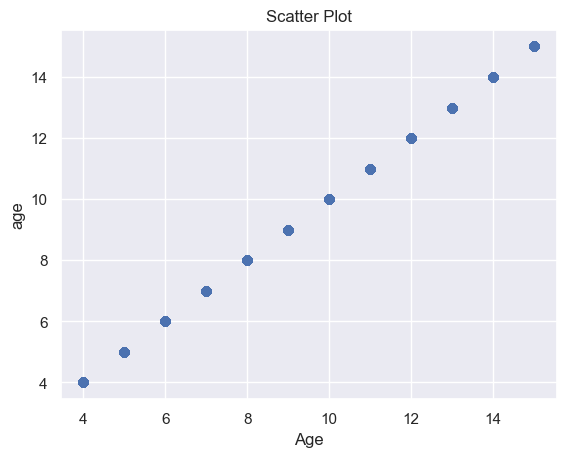

In [99]:
for col in train_binary_encoded.columns:
    plt.scatter(train_binary_encoded[col], train_binary_encoded["Age"])

    # Set labels for the x and y axes
    plt.xlabel(col)
    plt.ylabel("age")

    # Set the title of the plot
    plt.title('Scatter Plot')

    # Show the plot
    plt.show()

#### More Scatter Plot

c:\Users\patri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


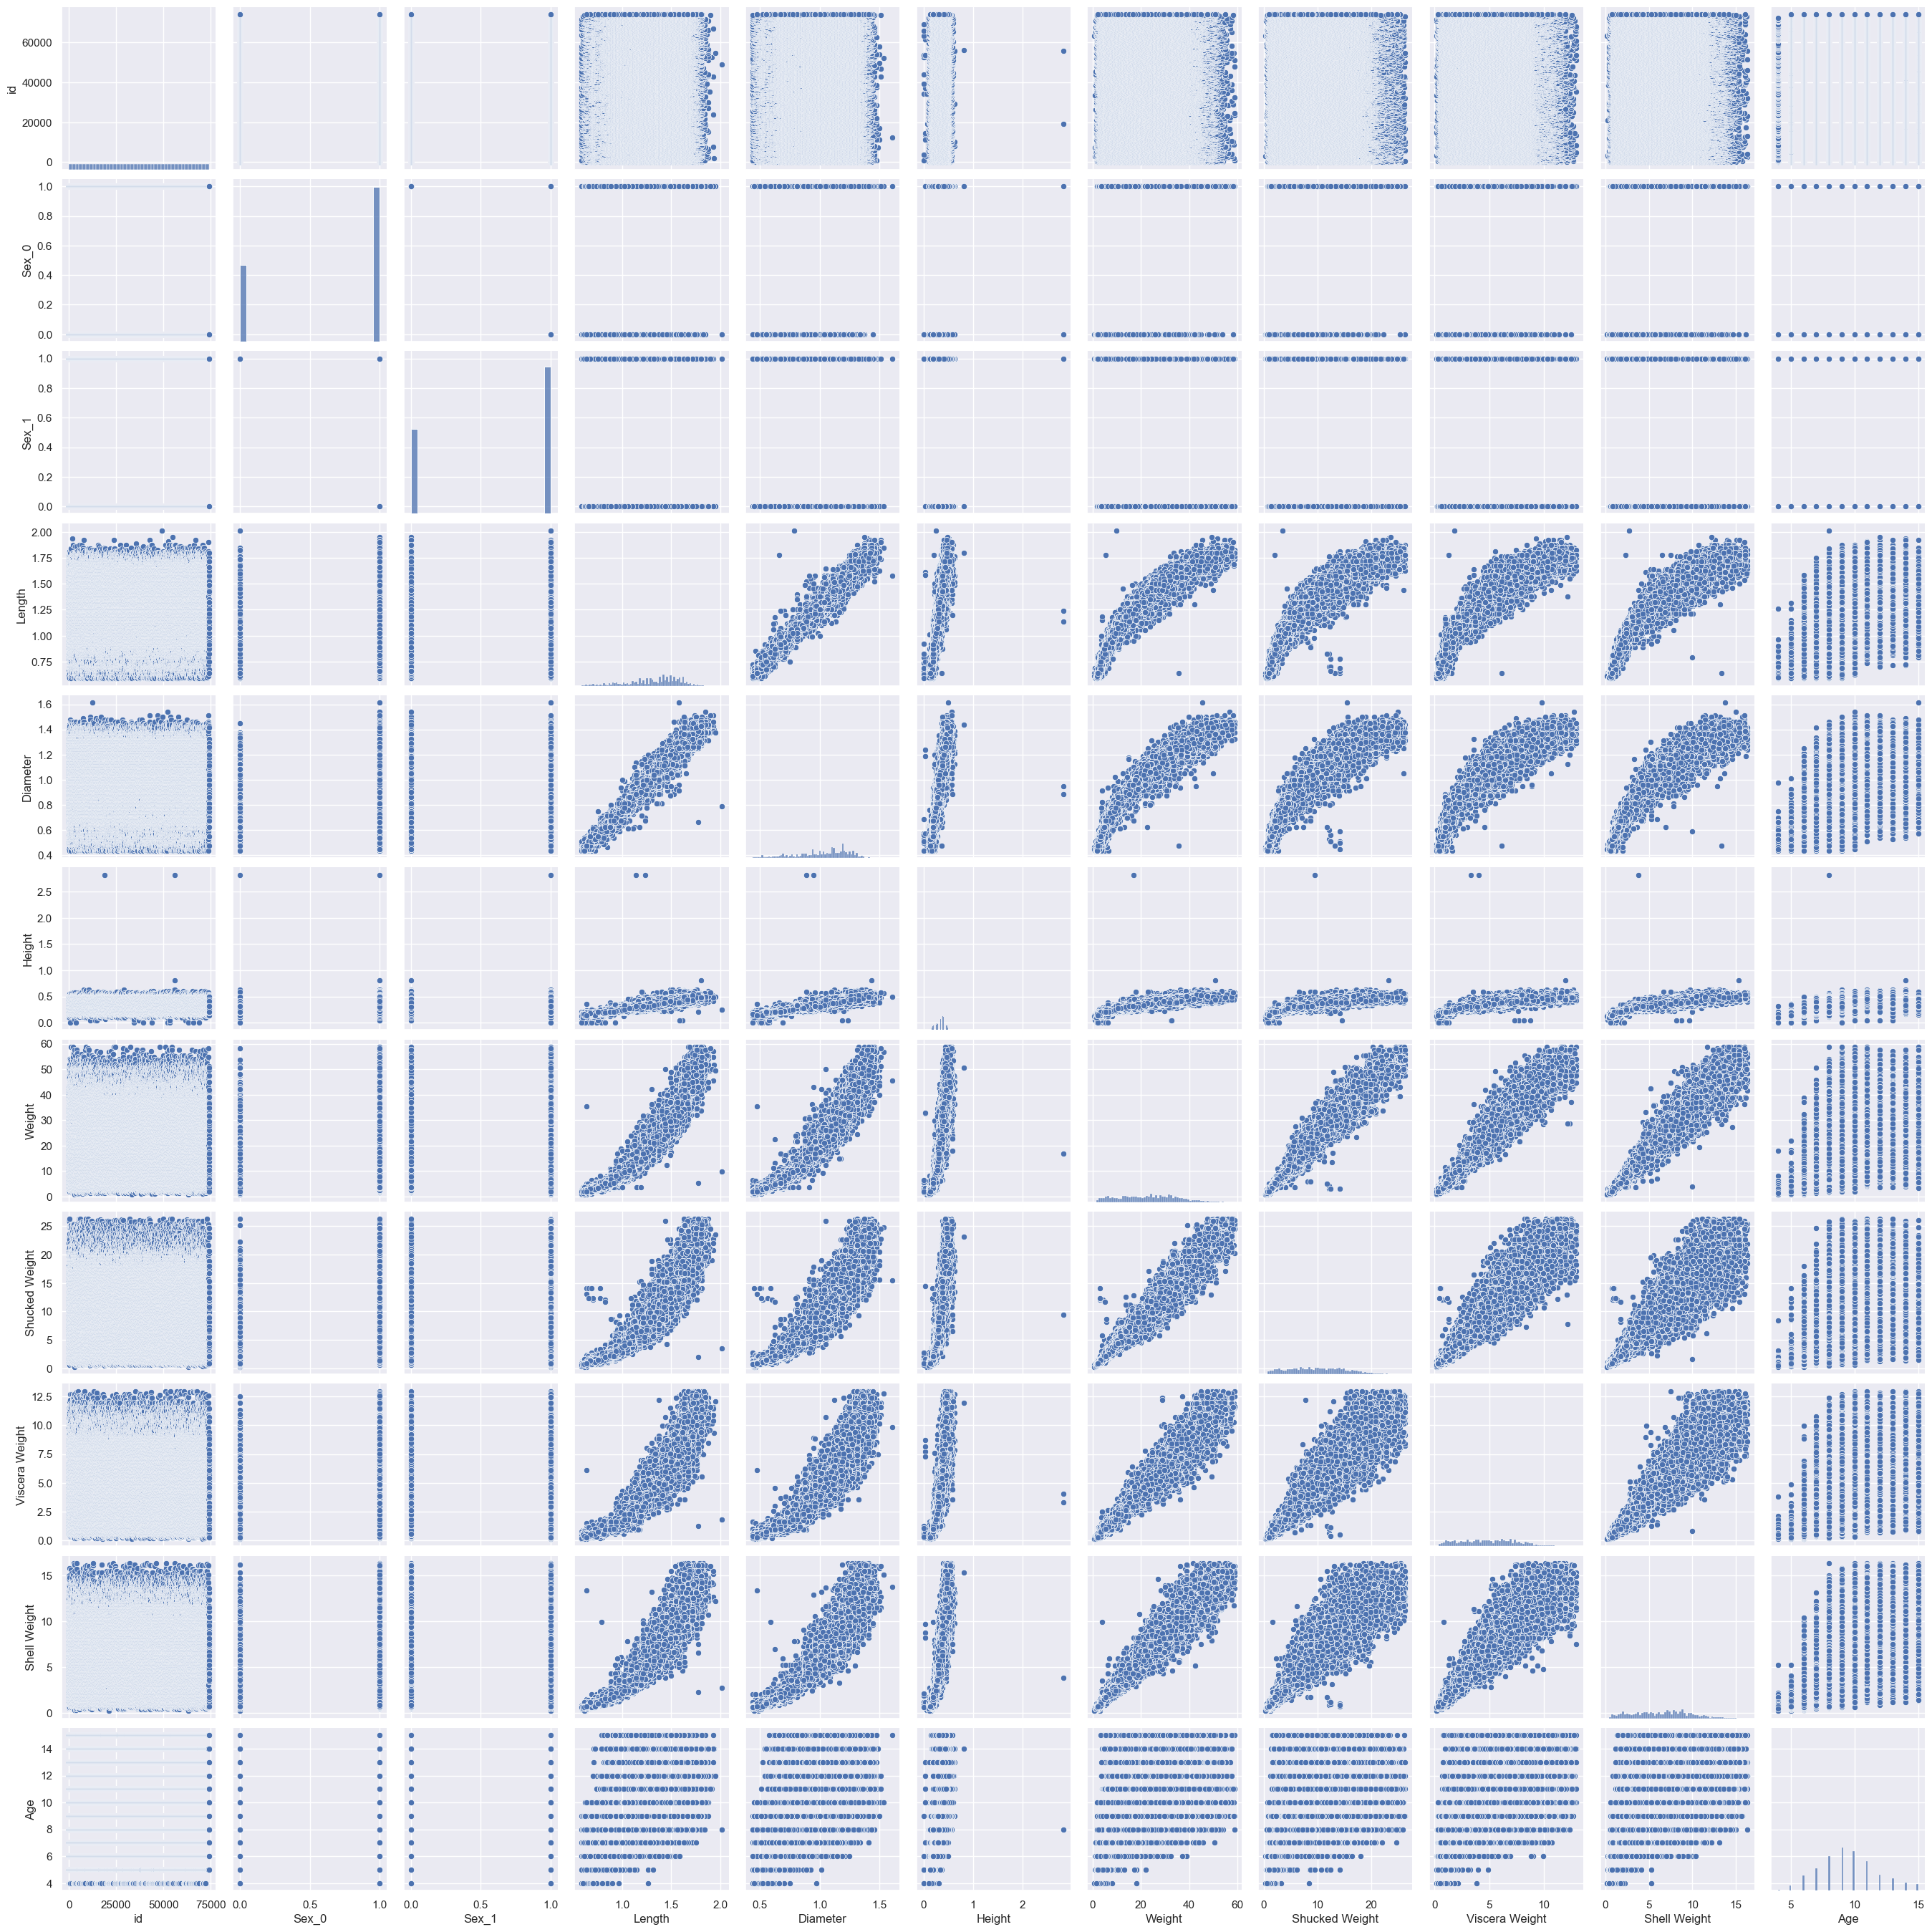

In [100]:
sns.set()
sns.pairplot(train_binary_encoded[train_binary_encoded.columns], size = 2.5)
plt.show()

#### Distribution and Probability Plot

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\1559498903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])


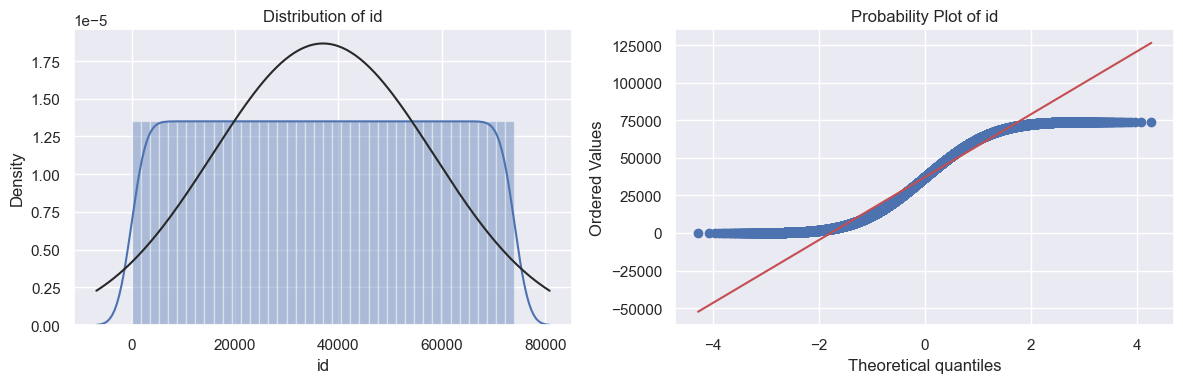

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\1559498903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])


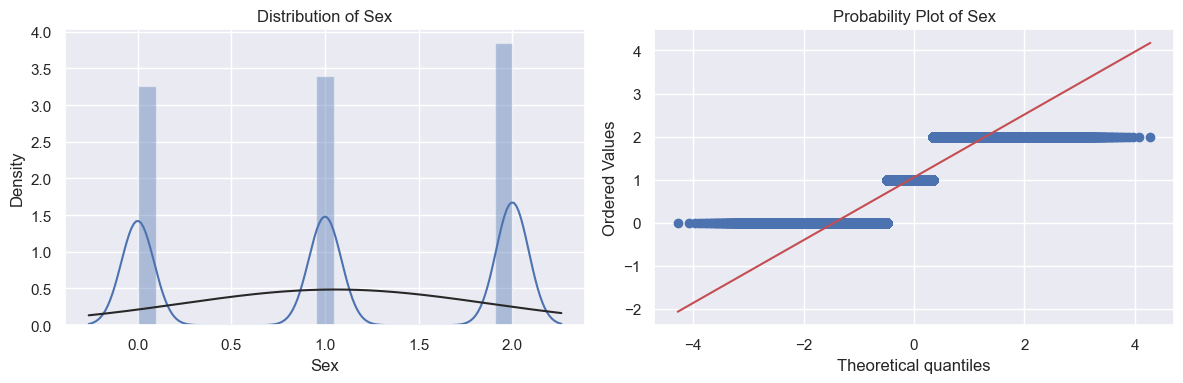

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\1559498903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])


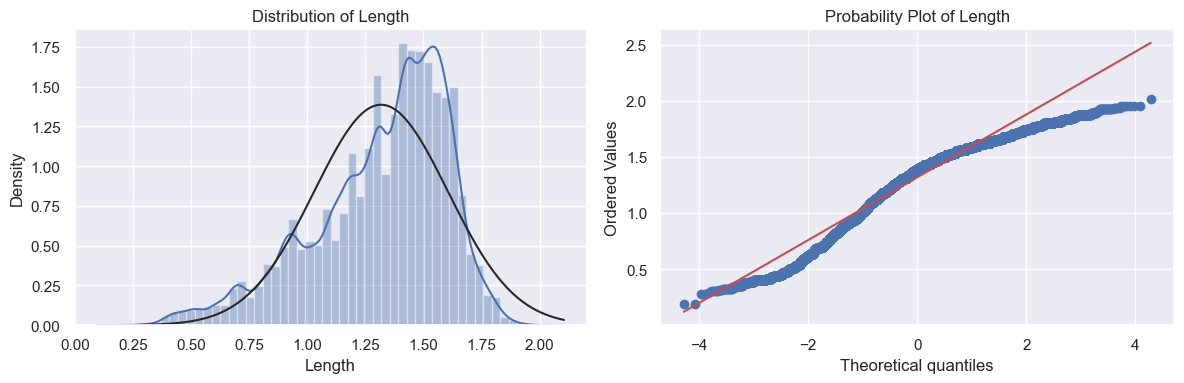

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\1559498903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])


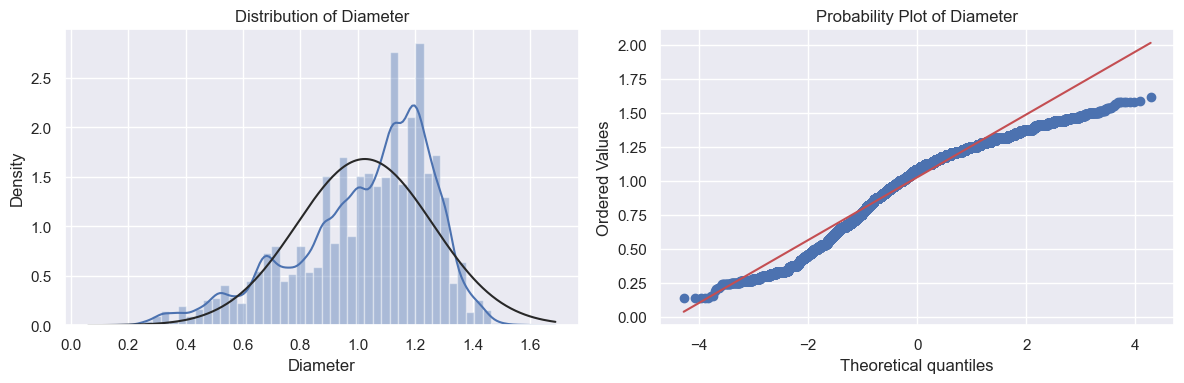

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\1559498903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])


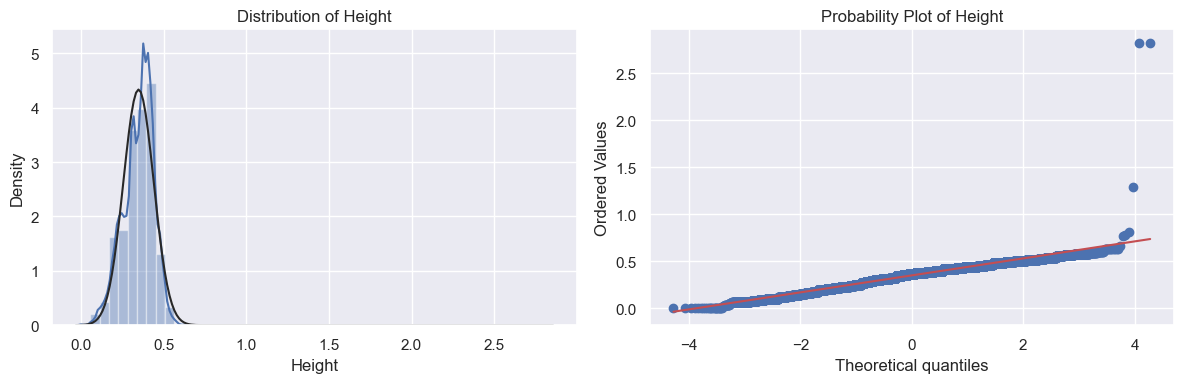

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\1559498903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])


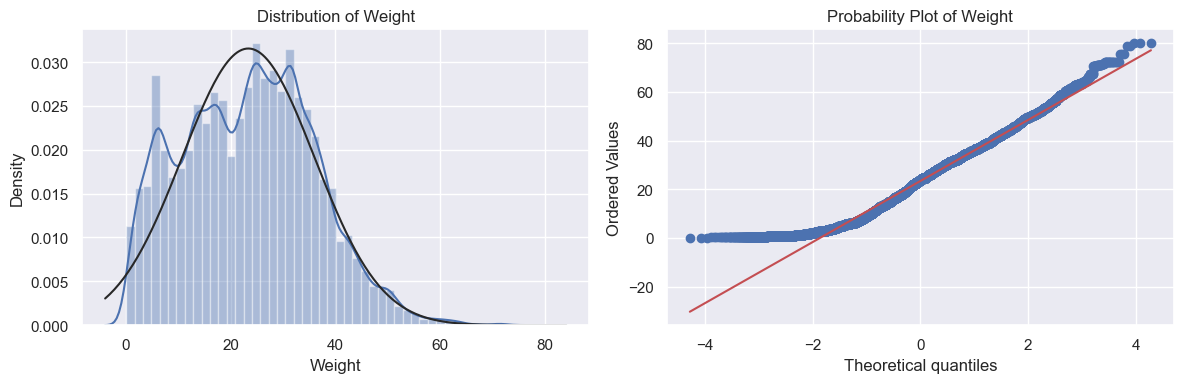

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\1559498903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])


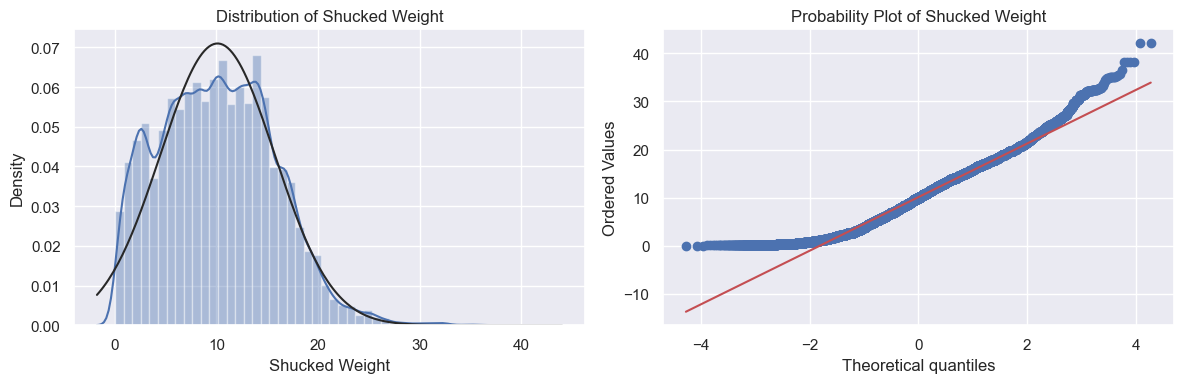

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\1559498903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])


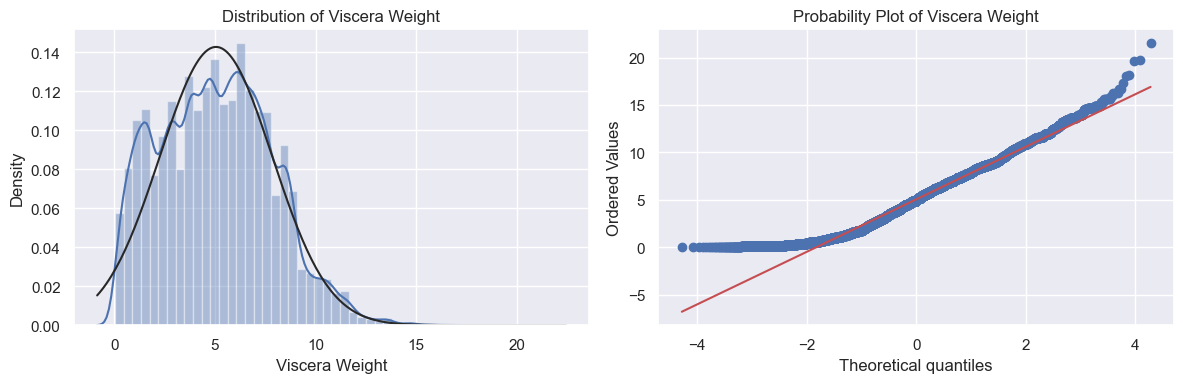

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\1559498903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])


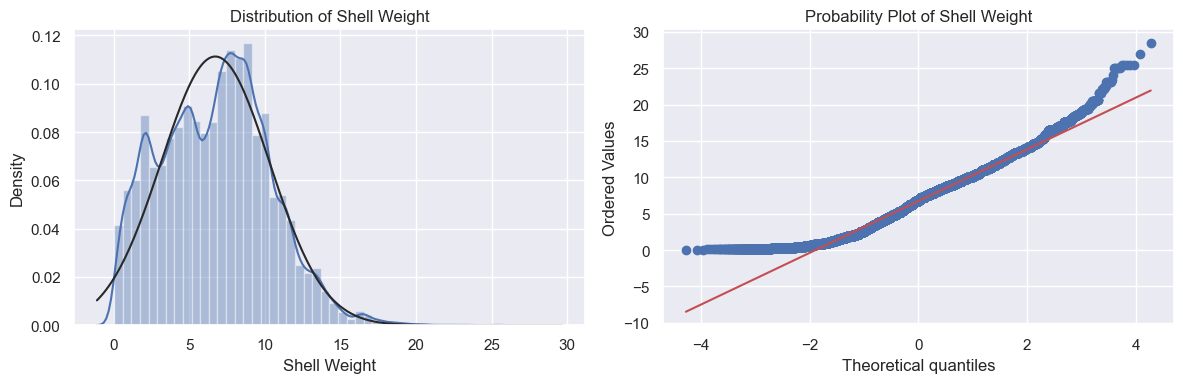

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\1559498903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])


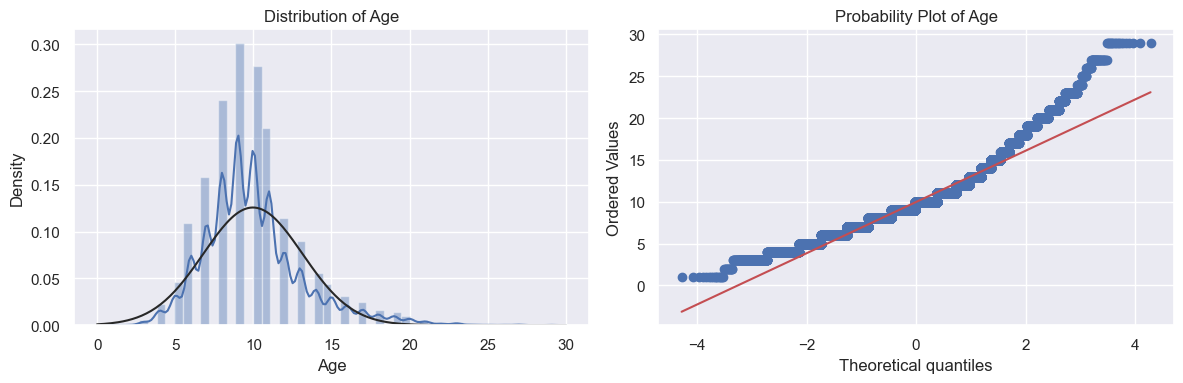

In [101]:
for column in train_numerical_encoded.columns:
    # Create a new figure and axes for each column
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Distribution plot
    sns.distplot(train_numerical_encoded[column], fit=stats.norm, ax=axes[0])
    axes[0].set_title(f"Distribution of {column}")

    # Probability plot
    stats.probplot(train_numerical_encoded[column], plot=axes[1])
    axes[1].set_title(f"Probability Plot of {column}")

    # Display the plots
    plt.tight_layout()
    plt.show()

## Feature Engineering

### Old

In [102]:
train_binary_encoded

id  Sex_0  Sex_1  Length  Diameter  Height     Weight   
0          0      0      1  1.5250    1.1750  0.3750  28.973189  \
1          1      0      1  1.1000    0.8250  0.2750  10.418441   
2          2      1      0  1.3875    1.1125  0.3750  24.777463   
3          3      1      1  1.7000    1.4125  0.5000  50.660556   
4          4      0      1  1.2500    1.0125  0.3375  23.289114   
...      ...    ...    ...     ...       ...     ...        ...   
74046  74046      1      1  1.6625    1.2625  0.4375  50.660556   
74047  74047      0      1  1.0750    0.8625  0.2750  10.446791   
74048  74048      1      1  1.4875    1.2000  0.4125  29.483480   
74049  74049      0      1  1.2125    0.9625  0.3125  16.768729   
74050  74050      0      1  0.9125    0.6750  0.2000   5.386405   

       Shucked Weight  Viscera Weight  Shell Weight  Age  
0           12.728926        6.647958      8.348928    9  
1            4.521745        2.324659      3.401940    8  
2           11.339800        5.556502      6.662133    9  
3           20.354941       10.991839     14.996885   11  
4           11.977664        4.507570      5.953395    8  
...               ...             ...           ...  ...  
74046       20.680960       10.361742     12.332033   10  
74047        4.323299        2.296310      3.543687    6  
74048       12.303683        7.540967      8.079607   10  
74049        8.972617        2.919999      4.280774    8  
74050        2.055339        1.034757      1.700970    6  

[67293 rows x 11 columns]

In [103]:
drop_col = ['Sex_0','Sex_1', 'id']
temp = train_binary_encoded.drop(drop_col, axis=1)
for col in temp:
    train_binary_encoded = train_binary_encoded[temp[col]>0.01]

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\3204079773.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_binary_encoded = train_binary_encoded[temp[col]>0.01]
C:\Users\patri\AppData\Local\Temp\ipykernel_24132\3204079773.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_binary_encoded = train_binary_encoded[temp[col]>0.01]
C:\Users\patri\AppData\Local\Temp\ipykernel_24132\3204079773.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_binary_encoded = train_binary_encoded[temp[col]>0.01]
C:\Users\patri\AppData\Local\Temp\ipykernel_24132\3204079773.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_binary_encoded = train_binary_encoded[temp[col]>0.01]
C:\Users\patri\AppData\Local\Temp\ipykernel_24132\3204079773.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_binary_encoded = train_binary

#### Making body weight

In [104]:
train_diameter = train_binary_encoded["Diameter"]
train_height = train_binary_encoded["Height"]
train_length = train_binary_encoded["Length"]
train_binary_encoded["Body Volume"] = (4/3) * math.pi *  train_diameter * train_length * train_height / 2

In [105]:
test_diameter = train_binary_encoded["Diameter"]
test_height = train_binary_encoded["Height"]
test_length = test_binary_encoded["Length"]
test_binary_encoded["Body Volume"] = 4/3 * math.pi * test_diameter * test_height * test_length / 2

#### Berat per satuan volume

In [106]:
train_binary_encoded["Weight Per Volume"] =  train_binary_encoded["Weight"] / train_binary_encoded["Body Volume"]
test_binary_encoded["Weight Per Volume"] =  test_binary_encoded["Weight"] / test_binary_encoded["Body Volume"]

In [107]:
train_binary_encoded.columns

Index(['id', 'Sex_0', 'Sex_1', 'Length', 'Diameter', 'Height', 'Weight',
       'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age',
       'Body Volume', 'Weight Per Volume'],
      dtype='object')

#### Weight per area

In [108]:
train_binary_encoded["Area"] = math.pi * train_length * train_diameter
test_binary_encoded["Area"] = math.pi * test_length * test_diameter

In [109]:
train_area = train_binary_encoded["Area"]
test_area = test_binary_encoded["Area"]
train_weight = train_binary_encoded["Weight"]
test_weight = test_binary_encoded["Weight"]
train_binary_encoded["Weight Per Area"] = train_area / train_weight

In [110]:
train_binary_encoded.dtypes

id                     int64
Sex_0                  int64
Sex_1                  int64
Length               float64
Diameter             float64
Height               float64
Weight               float64
Shucked Weight       float64
Viscera Weight       float64
Shell Weight         float64
Age                    int64
Body Volume          float64
Weight Per Volume    float64
Area                 float64
Weight Per Area      float64
dtype: object

In [111]:
train_binary_encoded

id  Sex_0  Sex_1  Length  Diameter  Height     Weight   
0          0      0      1  1.5250    1.1750  0.3750  28.973189  \
1          1      0      1  1.1000    0.8250  0.2750  10.418441   
2          2      1      0  1.3875    1.1125  0.3750  24.777463   
3          3      1      1  1.7000    1.4125  0.5000  50.660556   
4          4      0      1  1.2500    1.0125  0.3375  23.289114   
...      ...    ...    ...     ...       ...     ...        ...   
74046  74046      1      1  1.6625    1.2625  0.4375  50.660556   
74047  74047      0      1  1.0750    0.8625  0.2750  10.446791   
74048  74048      1      1  1.4875    1.2000  0.4125  29.483480   
74049  74049      0      1  1.2125    0.9625  0.3125  16.768729   
74050  74050      0      1  0.9125    0.6750  0.2000   5.386405   

       Shucked Weight  Viscera Weight  Shell Weight  Age  Body Volume   
0           12.728926        6.647958      8.348928    9     1.407335  \
1            4.521745        2.324659      3.401940    8     0.522682   
2           11.339800        5.556502      6.662133    9     1.212336   
3           20.354941       10.991839     14.996885   11     2.514583   
4           11.977664        4.507570      5.953395    8     0.894618   
...               ...             ...           ...  ...          ...   
74046       20.680960       10.361742     12.332033   10     1.923223   
74047        4.323299        2.296310      3.543687    6     0.534022   
74048       12.303683        7.540967      8.079607   10     1.542129   
74049        8.972617        2.919999      4.280774    8     0.763820   
74050        2.055339        1.034757      1.700970    6     0.258003   

       Weight Per Volume      Area  Weight Per Area  
0              20.587268  5.629341         0.194295  
1              19.932639  2.850995         0.273649  
2              20.437791  4.849343         0.195716  
3              20.146702  7.543749         0.148908  
4              26.032480  3.976078         0.170727  
...                  ...       ...              ...  
74046          26.341484  6.593908         0.130159  
74047          19.562485  2.912845         0.278827  
74048          19.118682  5.607743         0.190199  
74049          21.953766  3.666337         0.218641  
74050          20.877272  1.935025         0.359242  

[67283 rows x 15 columns]

In [112]:
train_binary_encoded.columns

Index(['id', 'Sex_0', 'Sex_1', 'Length', 'Diameter', 'Height', 'Weight',
       'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age',
       'Body Volume', 'Weight Per Volume', 'Area', 'Weight Per Area'],
      dtype='object')

### Normalization

In [113]:
train_binary_encoded.dtypes

id                     int64
Sex_0                  int64
Sex_1                  int64
Length               float64
Diameter             float64
Height               float64
Weight               float64
Shucked Weight       float64
Viscera Weight       float64
Shell Weight         float64
Age                    int64
Body Volume          float64
Weight Per Volume    float64
Area                 float64
Weight Per Area      float64
dtype: object

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


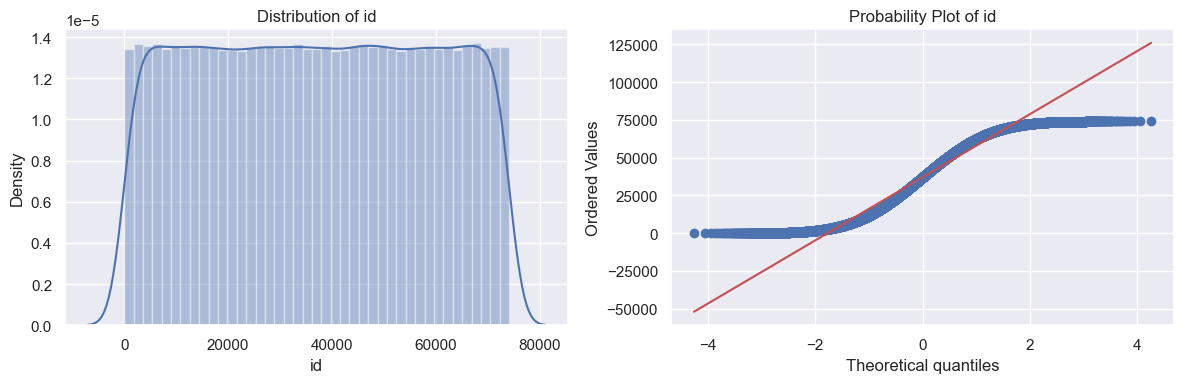

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


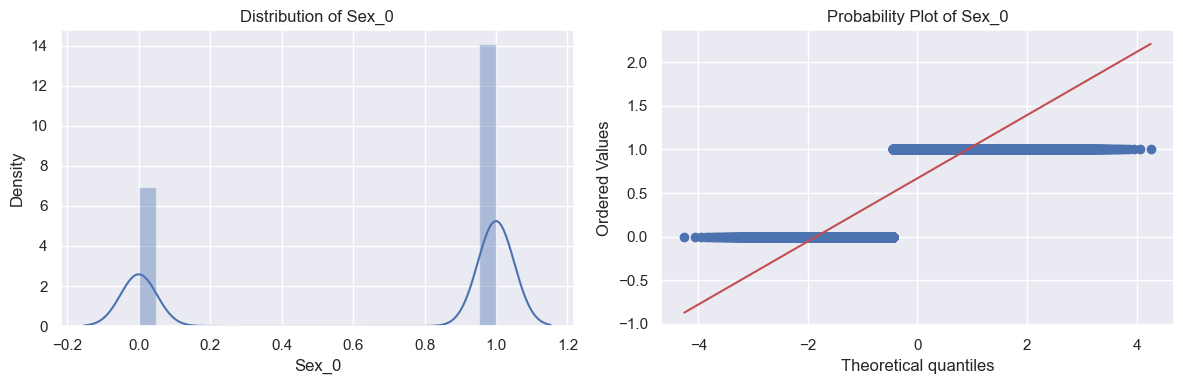

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


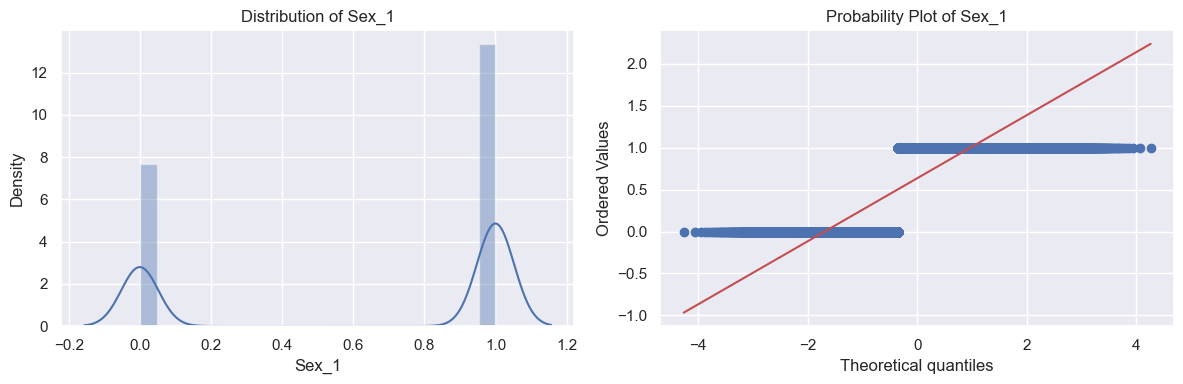

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


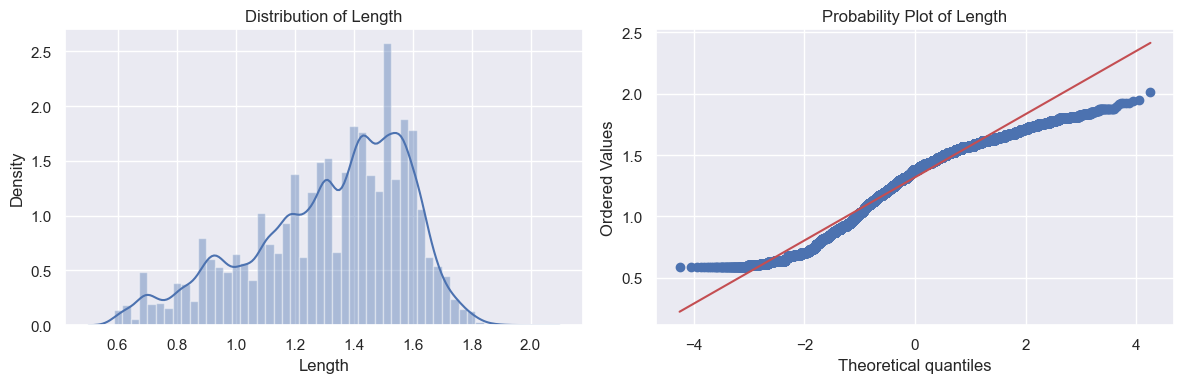

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


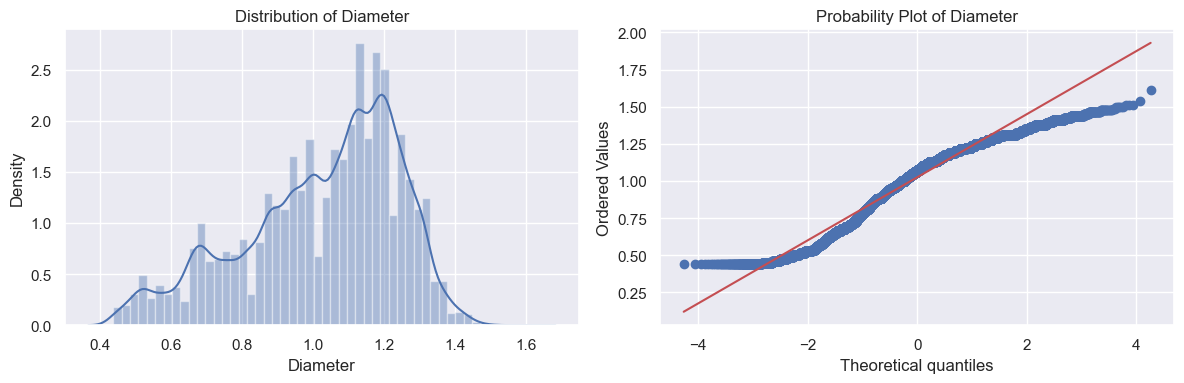

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


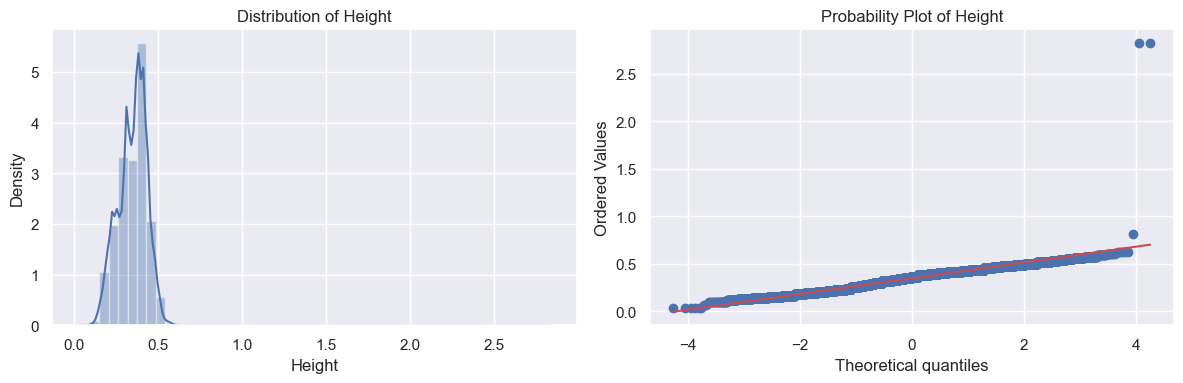

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


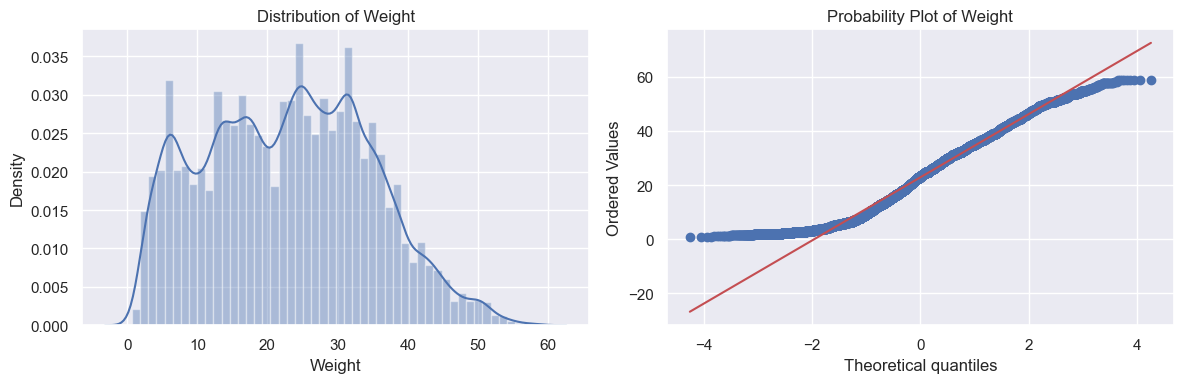

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


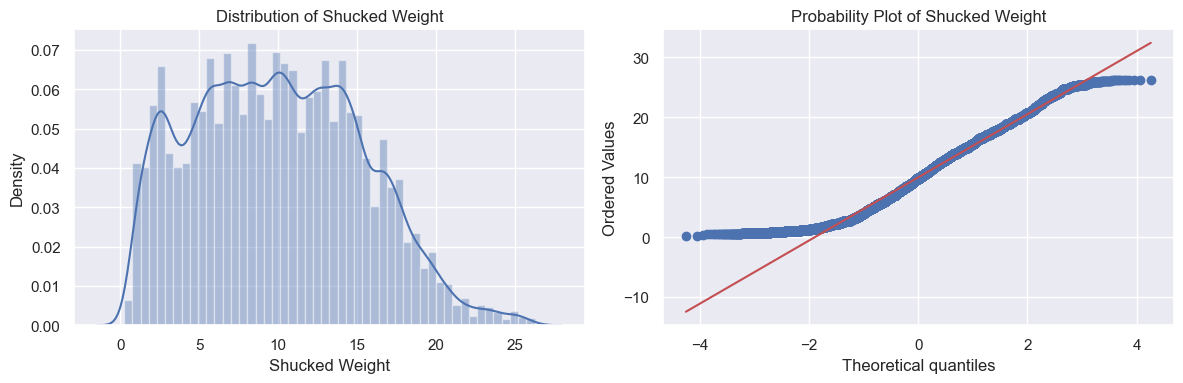

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


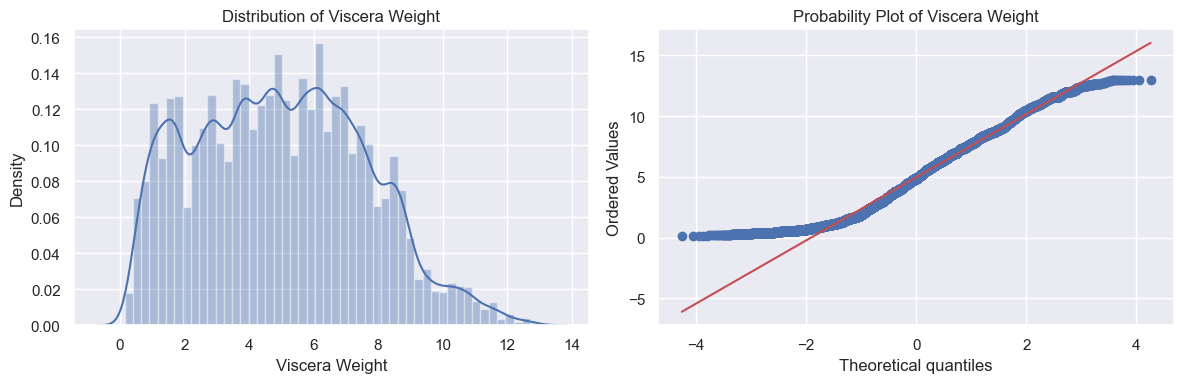

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


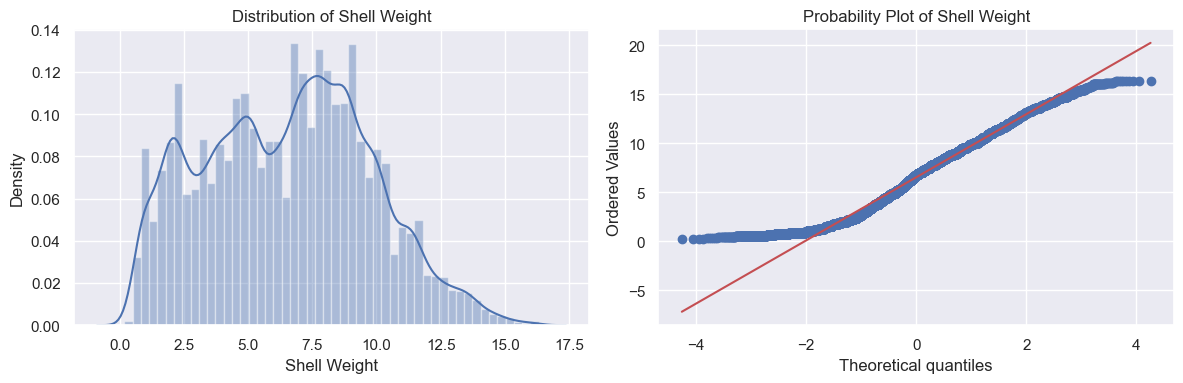

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


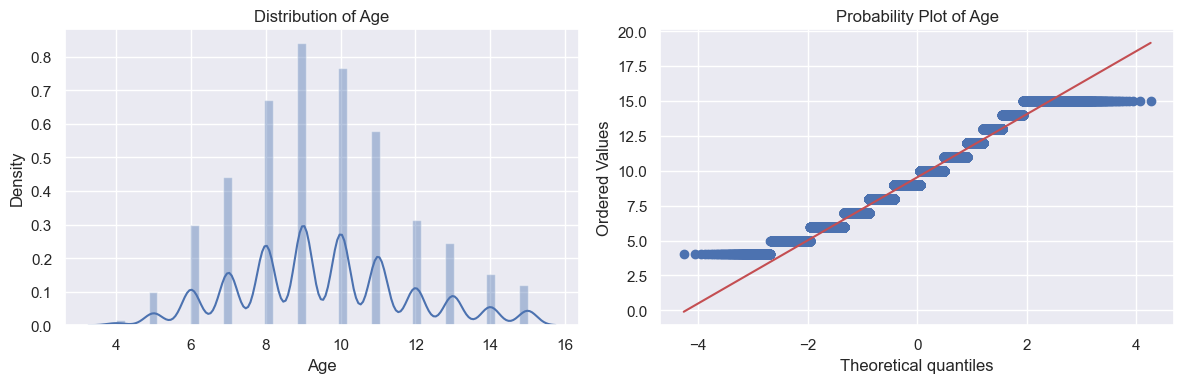

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


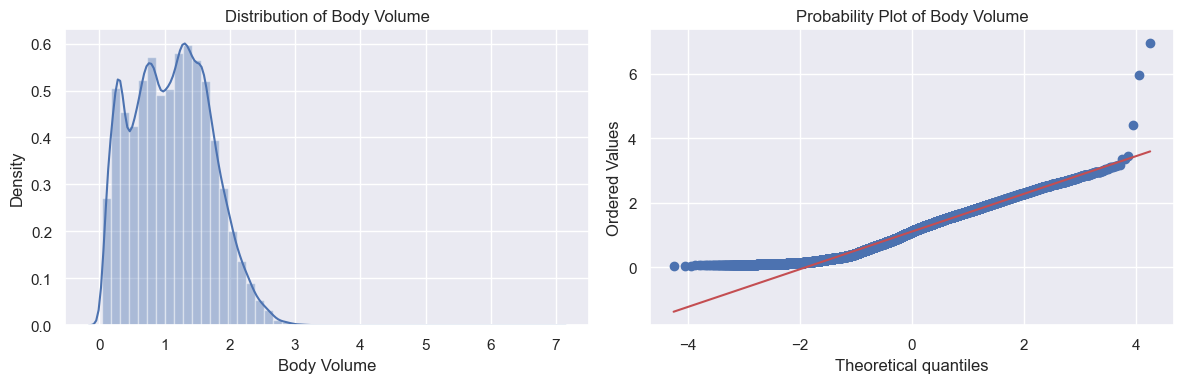

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


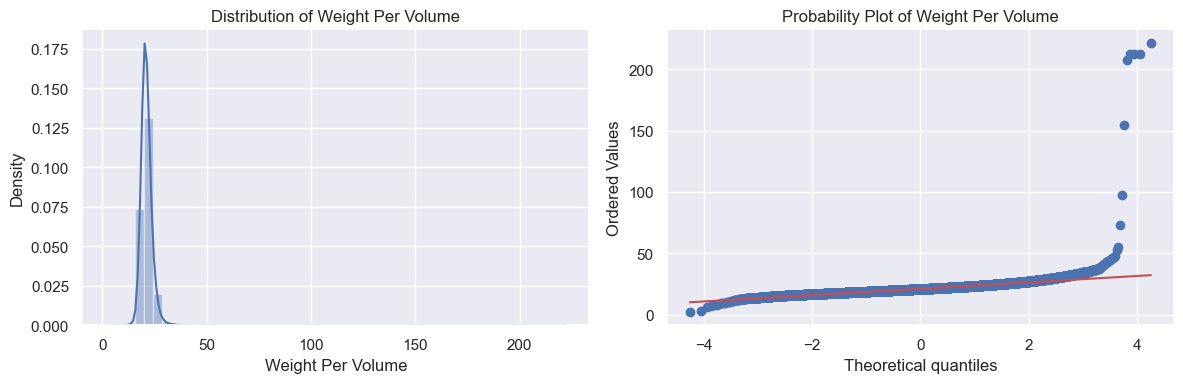

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


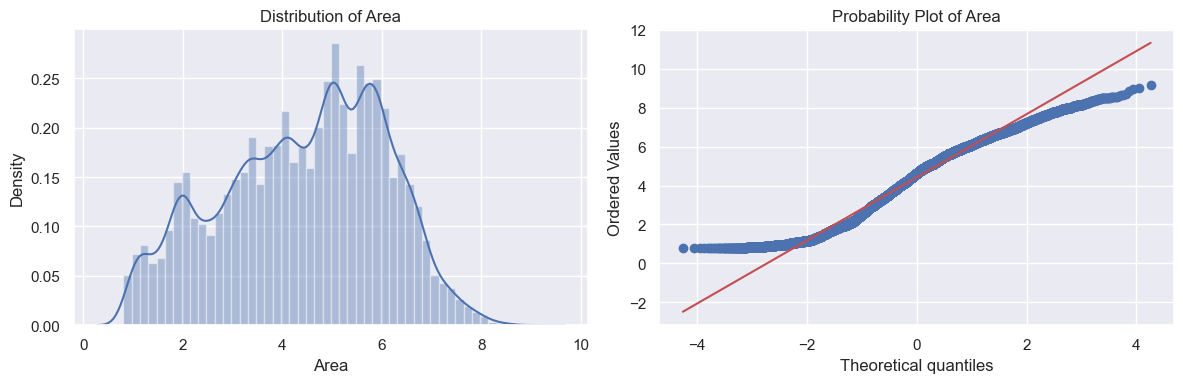

C:\Users\patri\AppData\Local\Temp\ipykernel_24132\523850852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_binary_encoded[column], ax=axes[0])


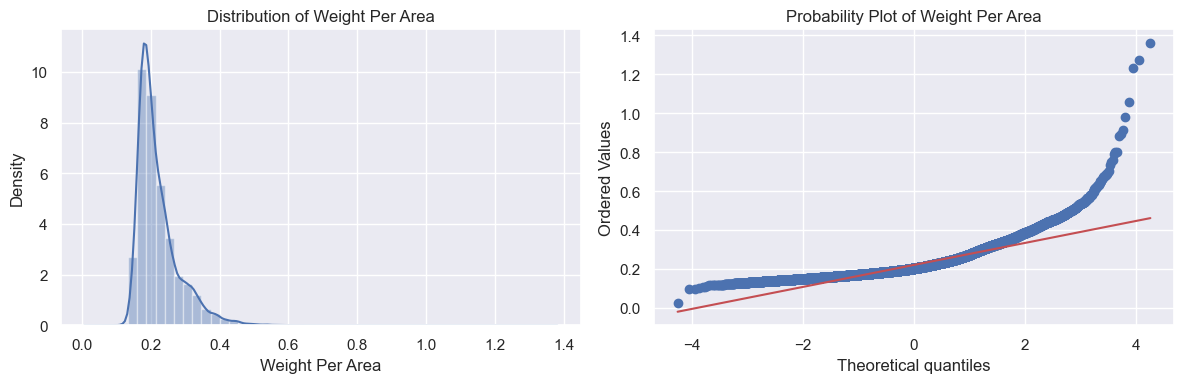

In [114]:
for column in train_binary_encoded:
    # Create a new figure and axes for each column
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Distribution plot
    sns.distplot(train_binary_encoded[column], ax=axes[0])
    axes[0].set_title(f"Distribution of {column}")

    # Probability plot
    stats.probplot(train_binary_encoded[column], plot=axes[1])
    axes[1].set_title(f"Probability Plot of {column}")

    # Display the plots
    plt.tight_layout()
    plt.show()

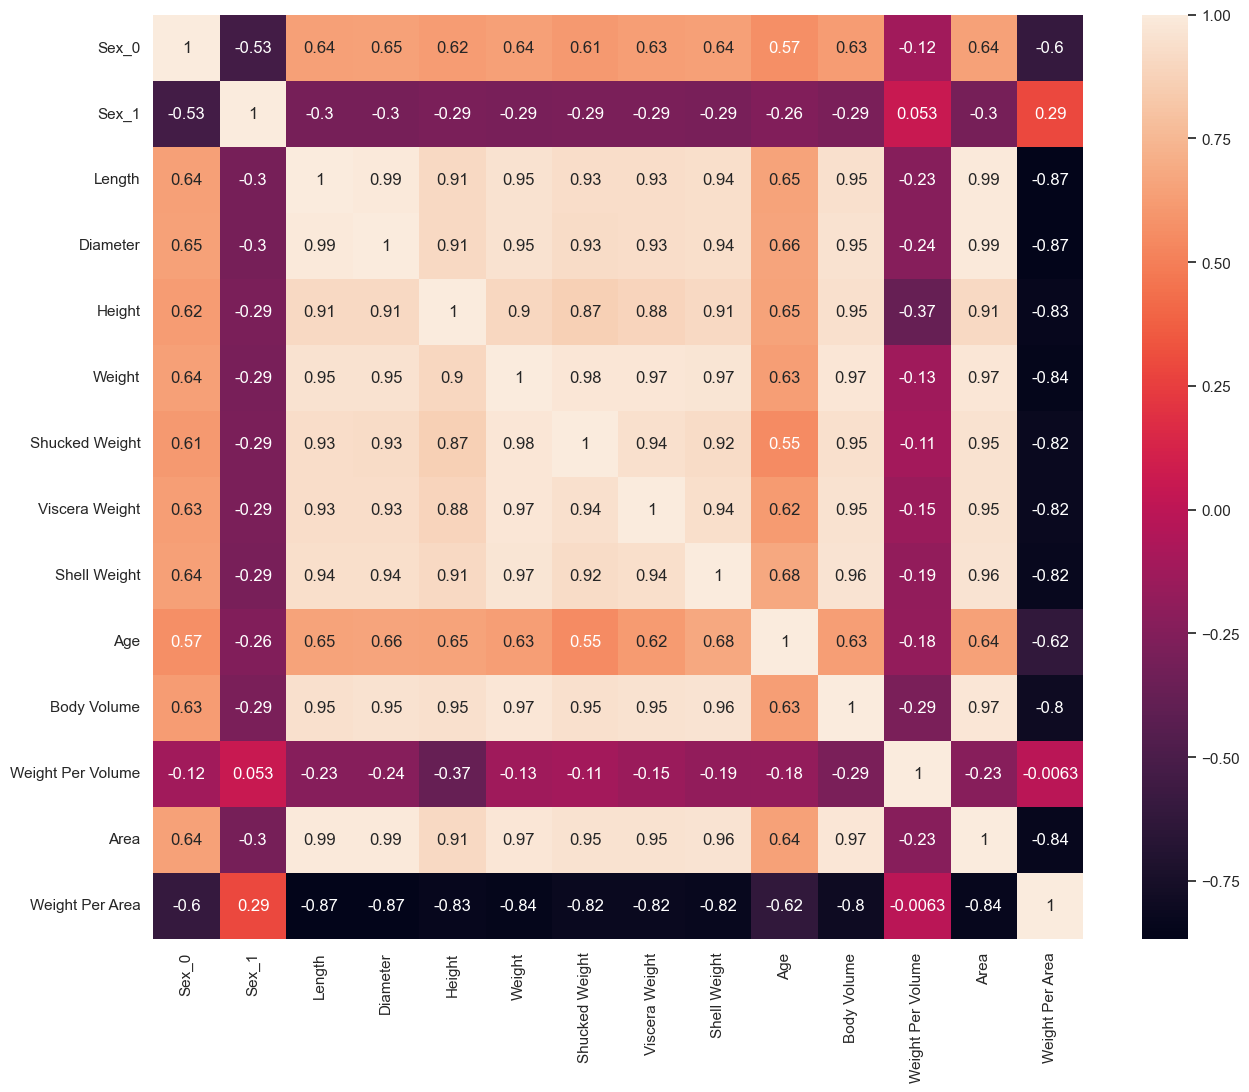

In [116]:
plt.figure(figsize=(15, 12))
sns.heatmap(train_binary_encoded.drop("id", axis=1).corr(), annot=True)
plt.show()

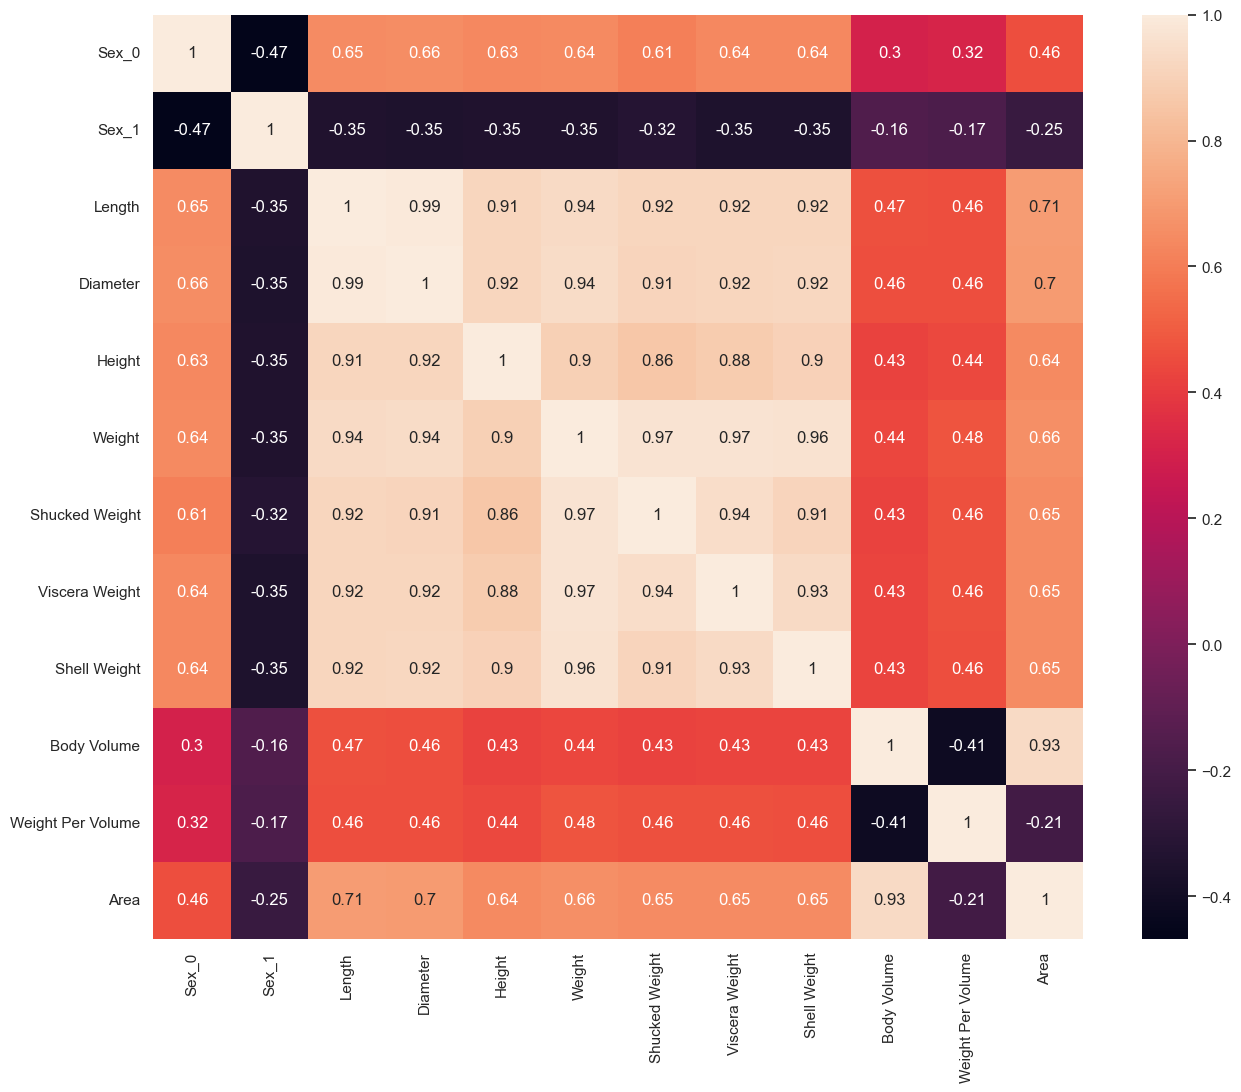

In [117]:
plt.figure(figsize=(15, 12))
sns.heatmap(test_binary_encoded.drop("id", axis=1).corr(), annot=True)
plt.show()

## Modelling

In [118]:
temp = train_binary_encoded["Age"]
train_binary_encoded = train_binary_encoded.drop("Age", axis=1)
train_binary_encoded["Age"] = temp

In [119]:
train_binary_encoded


id  Sex_0  Sex_1  Length  Diameter  Height     Weight   
0          0      0      1  1.5250    1.1750  0.3750  28.973189  \
1          1      0      1  1.1000    0.8250  0.2750  10.418441   
2          2      1      0  1.3875    1.1125  0.3750  24.777463   
3          3      1      1  1.7000    1.4125  0.5000  50.660556   
4          4      0      1  1.2500    1.0125  0.3375  23.289114   
...      ...    ...    ...     ...       ...     ...        ...   
74046  74046      1      1  1.6625    1.2625  0.4375  50.660556   
74047  74047      0      1  1.0750    0.8625  0.2750  10.446791   
74048  74048      1      1  1.4875    1.2000  0.4125  29.483480   
74049  74049      0      1  1.2125    0.9625  0.3125  16.768729   
74050  74050      0      1  0.9125    0.6750  0.2000   5.386405   

       Shucked Weight  Viscera Weight  Shell Weight  Body Volume   
0           12.728926        6.647958      8.348928     1.407335  \
1            4.521745        2.324659      3.401940     0.522682   
2           11.339800        5.556502      6.662133     1.212336   
3           20.354941       10.991839     14.996885     2.514583   
4           11.977664        4.507570      5.953395     0.894618   
...               ...             ...           ...          ...   
74046       20.680960       10.361742     12.332033     1.923223   
74047        4.323299        2.296310      3.543687     0.534022   
74048       12.303683        7.540967      8.079607     1.542129   
74049        8.972617        2.919999      4.280774     0.763820   
74050        2.055339        1.034757      1.700970     0.258003   

       Weight Per Volume      Area  Weight Per Area  Age  
0              20.587268  5.629341         0.194295    9  
1              19.932639  2.850995         0.273649    8  
2              20.437791  4.849343         0.195716    9  
3              20.146702  7.543749         0.148908   11  
4              26.032480  3.976078         0.170727    8  
...                  ...       ...              ...  ...  
74046          26.341484  6.593908         0.130159   10  
74047          19.562485  2.912845         0.278827    6  
74048          19.118682  5.607743         0.190199   10  
74049          21.953766  3.666337         0.218641    8  
74050          20.877272  1.935025         0.359242    6  

[67283 rows x 15 columns]

In [120]:
train_binary_encoded = train_binary_encoded.drop("id", axis=1)

In [121]:
param_grid = {
    'iterations': [10, 20, 50, 100, 200, 300],
    'depth': [4, 6, 8, 12],
    'learning_rate': [0.1, 0.01, 0.001],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [16, 32, 64, 128],
    'bootstrap_type': ['Bayesian', 'Bernoulli'],
    'eval_metric': ['Accuracy', 'AUC', 'F1'],
}


In [124]:
X_train = train_binary_encoded.drop("Age", axis=1)
y_train = train_binary_encoded["Age"]
cboost = cb.CatBoostClassifier()
grid_search = GridSearchCV(estimator=cboost, param_grid=param_grid, cv=5, scoring='accuracy', refit= True, n_jobs=-1, verbose = 2)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(test_binary_encoded.drop("id", axis=1))

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


KeyboardInterrupt: 

In [ ]:
pred = pd.read_csv("sample_submission.csv")
pred["Age"] = y_pred
pred.to_csv("final1.csv", index=False)